In [3]:
import pandas as pd
from os import path

In [4]:
from glob import glob

In [5]:
glob("data/*.csv")

[]

In [4]:
#file_path = path.join("data", "accidents_2022", "Unfallorte2022_LinRef.csv")
#file_path

In [6]:
#df = pd.read_csv(file_path, sep=";")
df = pd.read_csv('Berlin-incidents.csv', on_bad_lines='skip')

In [7]:
df.head(5)

,lat,lon,ts,bike,childCheckBox,trailerCheckBox,pLoc,incident,i1,i2,...,i4,i5,i6,i7,i8,i9,scary,desc,i10,region
0,52.532325,13.394867,1572971392862,1.0,0,0,5.0,1,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
1,52.583117,13.428656,1574096883339,1.0,0,0,1.0,4,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
2,52.532983,13.329724,1574094864375,1.0,0,0,1.0,3,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
3,52.554064,13.383081,1574095749659,1.0,0,0,1.0,2,0,0,...,0,0,0,1,0,0,1,NaN,0,Berlin
4,52.439985,13.245853,1573196026398,7.0,0,0,2.0,1,0,0,...,0,0,0,1,0,0,0,mehrere,0,Berlin


In [9]:
df.columns

Index(['lat', 'lon', 'ts', 'bike', 'childCheckBox', 'trailerCheckBox', 'pLoc',
       'incident', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9',
       'scary', 'desc', 'i10', 'region'],
      dtype='object')

In [25]:
X.shape
y.shape

(17226, 1)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [18]:
columns = ['lat', 'lon', 'ts', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'scary']

df = df.loc[:, columns]
df.head(10)

,lat,lon,ts,i1,i2,i3,i4,i5,i6,i7,scary
0,52.532325,13.394867,1572971392862,0,0,0,0,0,0,1,0
1,52.583117,13.428656,1574096883339,0,0,0,0,0,0,1,0
2,52.532983,13.329724,1574094864375,0,0,0,0,0,0,1,0
3,52.554064,13.383081,1574095749659,0,0,0,0,0,0,1,1
4,52.439985,13.245853,1573196026398,0,0,0,0,0,0,1,0
5,52.439213,13.247729,1573196005032,0,0,0,0,0,0,1,0
6,52.532360,13.396198,1573574809680,0,0,0,0,0,0,1,0
7,52.480886,13.330931,1572927627905,0,0,0,1,0,0,0,0
8,52.493152,13.275503,1574406604818,0,0,0,0,0,0,1,0
9,52.514712,13.463594,1572782888202,0,0,0,1,0,0,0,0


In [19]:
features = ['lat', 'lon', 'ts', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7']
X = df.loc[:, features]
y = df.loc[:, ['scary']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [27]:
"""
X_train.shape
X_test.shape
y_train.shape
y_test.shape
"""

'\nX_train.shape\nX_test.shape\ny_train.shape\ny_test.shape\n'

In [28]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [29]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [30]:
# Predicting multiple observations
reg.predict(X_test[0:10])

array([0.34868249, 0.34868249, 0.34868249, 0.20214106, 0.34868249,
       0.1475222 , 0.49425287, 0.1475222 , 0.1475222 , 0.1475222 ])

In [31]:
X_test.head(1)

,lat,lon,ts,i1,i2,i3,i4,i5,i6,i7
5003,52.531756,13.381591,1602411386804,0,0,0,0,0,0,1


In [32]:
# predict 1 observation.
reg.predict(X_test.iloc[0].values.reshape(1,-1))

C:\Users\mmeug\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.34868249])

In [33]:
#measuring train test split model performance using R^2 -> best is 1
score = reg.score(X_test, y_test)
print(score)

0.03827558694263178


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:

# Step 4: Initialize the Linear Regression model
model = LinearRegression()

In [40]:
# Step 5: Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Step 6: Make predictions on the test data
y_pred = model.predict(X_test)

In [43]:
# Step 7: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R2): {r2}")

Mean Squared Error (MSE): 0.19622814281690318
R-squared Score (R2): 0.03395034135797159


In [44]:
# Step 8: Optional - Check the model coefficients (weights of each feature)
print("Model Coefficients:", model.coef_)

Model Coefficients: [[ 3.45798539e-01  6.55667840e-01  1.12632126e-12  6.54793352e-02
  -1.49699103e-01 -1.82697371e-01 -1.60866655e-02  2.25818254e-02
   8.17428165e-03 -4.61254010e-03]]


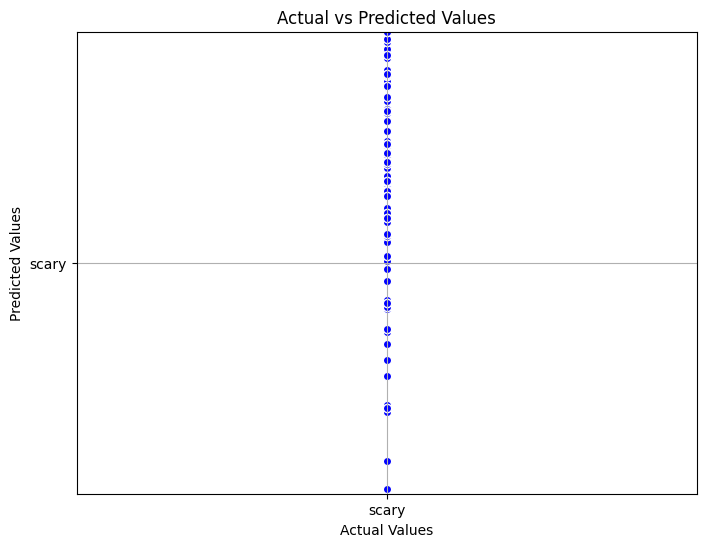

In [46]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Identity line (y=x)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


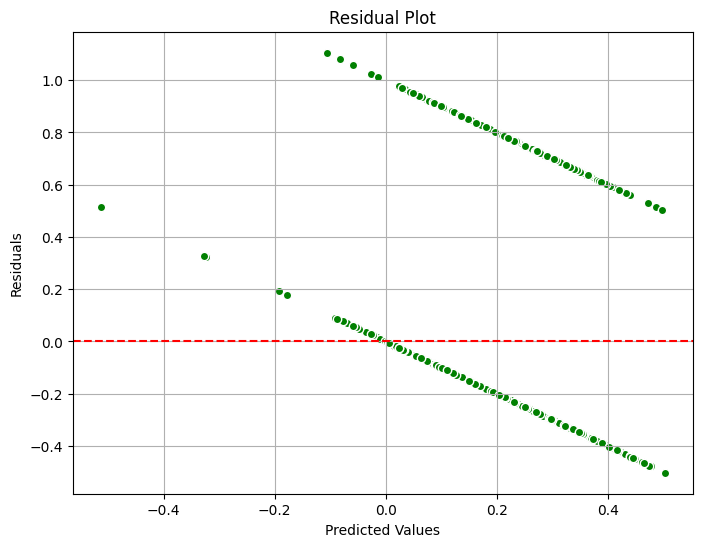

In [47]:
# Step 2: Residual Plot (Residuals = Actual - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', edgecolor='w')
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

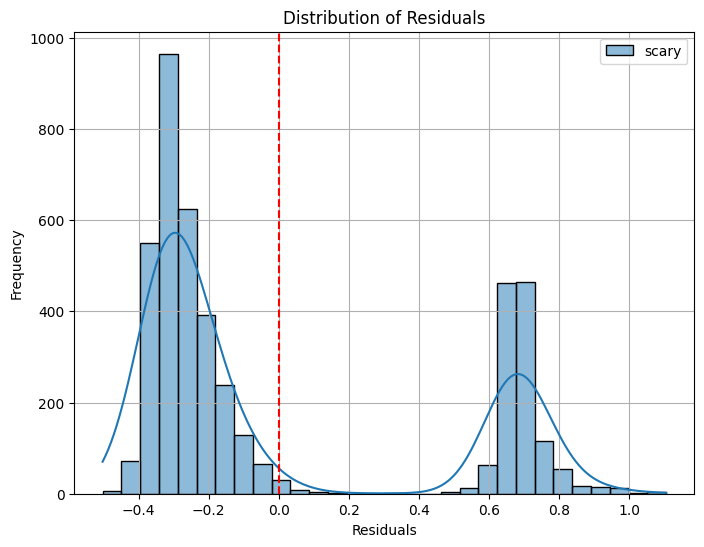

In [48]:

# Step 3: Distribution Plot of Residuals (Should be approximately normal)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')  # Vertical line at 0
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

In [49]:
# Step 4: Regression line (for single feature models)
# Only works if X has a single feature (or use the first feature for illustration)
# Replace 'X_train[:, 0]' with your feature column if needed.
if X_train.shape[1] == 1:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', edgecolor='w', label='Actual Data')
    plt.plot(X_test, y_pred, color='red', label='Regression Line')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.title('Linear Regression Line (Single Feature)')
    plt.legend()
    plt.grid(True)
    plt.show()
Explanation of Each Plot:

SyntaxError: invalid syntax (2849359360.py, line 14)